<a href="https://colab.research.google.com/github/hewettac/OOP-New/blob/main/ML_2_24_26_Hands_On_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[42934537571107.35,
 20813539568389.56,
 11824351107865.102,
 7523937487036.392,
 5873868902422.271,
 4772605735783.444,
 3674990973389.5264,
 3275746862697.668,
 2874923797001.5005]

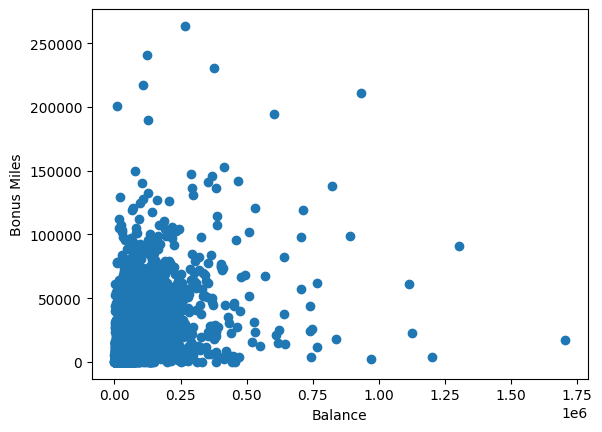

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline
df = pd.read_csv('EastWestAirlines.csv')
df

x = df[['Balance']]
y = df['Bonus_miles']

#scatterplot
plt.scatter(x, y)
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')

#split into training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.linear_model import LinearRegression

# find sse values

from sklearn.cluster import KMeans
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['Balance', 'Bonus_miles']])
  sse.append(km.inertia_)

sse


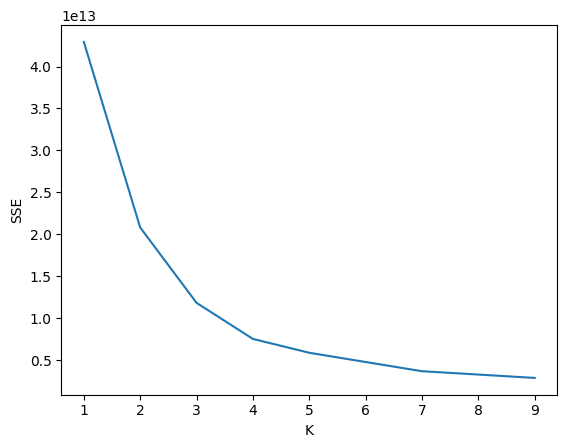

In [ ]:

# plot sse and find elbow

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,10),sse)
plt.show()

In [ ]:

# determine number of clusters
km = KMeans(n_clusters=4)
km


KMeans(n_clusters=4)

In [ ]:
# predict what clusters people fall into
y_predicted = km.fit_predict(df[['Balance', 'Bonus_miles']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# assign clusters as column

df['cluster'] = y_predicted
df.head(10)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3


<function matplotlib.pyplot.show(close=None, block=None)>

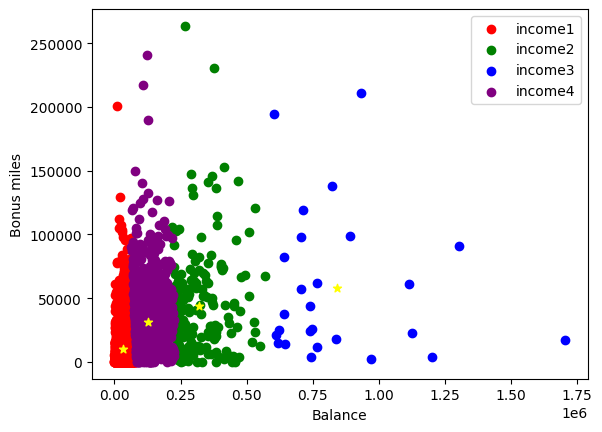

In [ ]:

# graph clusters

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Balance, df1.Bonus_miles, color = 'red', label = 'income1')
plt.scatter(df2.Balance, df2.Bonus_miles, color = 'green', label = 'income2')
plt.scatter(df3.Balance, df3.Bonus_miles, color = 'blue', label = 'income3')
plt.scatter(df4.Balance, df4.Bonus_miles, color = 'purple', label = 'income4')

plt.xlabel('Balance')
plt.ylabel('Bonus miles')
plt.legend()

# show centroids for each cluster

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.show

In [ ]:

# scale the data within 0-1 range

df_new = df.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_new[['Bonus_miles']])
df_new['Bonus_miles'] = scaler.transform(df_new[['Bonus_miles']])

scaler.fit(df[['Balance']])
df_new['Balance'] = scaler.transform(df_new[['Balance']])
df_new


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,1,0.016508,0,1,1,1,0.000660,1,0,0,7000,0,0
1,2,0.011288,0,1,1,1,0.000815,2,0,0,6968,0,0
2,3,0.024257,0,1,1,1,0.015636,4,0,0,7034,0,0
3,4,0.008667,0,1,1,1,0.001896,1,0,0,6952,0,0
4,5,0.057338,0,4,1,1,0.164211,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0.010837,0,1,1,1,0.032330,4,200,1,1403,1,0
3995,4018,0.037766,0,1,1,1,0.003720,5,0,0,1395,1,0
3996,4019,0.043169,0,3,1,1,0.096505,8,0,0,1402,1,0
3997,4020,0.032202,0,1,1,1,0.001896,1,500,1,1401,0,0


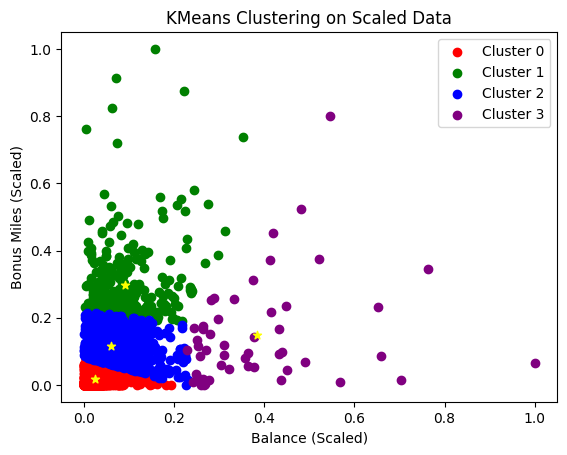

In [ ]:
# Rerun KMeans on the scaled data (df_new)
km_scaled = KMeans(n_clusters=4)
y_predicted_scaled = km_scaled.fit_predict(df_new[['Balance', 'Bonus_miles']])

df_new['cluster'] = y_predicted_scaled

# Graph clusters using scaled data from df_new

df1_scaled = df_new[df_new.cluster==0]
df2_scaled = df_new[df_new.cluster==1]
df3_scaled = df_new[df_new.cluster==2]
df4_scaled = df_new[df_new.cluster==3]

plt.scatter(df1_scaled.Balance, df1_scaled.Bonus_miles, color = 'red', label = 'Cluster 0')
plt.scatter(df2_scaled.Balance, df2_scaled.Bonus_miles, color = 'green', label = 'Cluster 1')
plt.scatter(df3_scaled.Balance, df3_scaled.Bonus_miles, color = 'blue', label = 'Cluster 2')
plt.scatter(df4_scaled.Balance, df4_scaled.Bonus_miles, color = 'purple', label = 'Cluster 3')

plt.xlabel('Balance (Scaled)')
plt.ylabel('Bonus Miles (Scaled)')
plt.legend()

# show centroids for each cluster from the scaled data

plt.scatter(km_scaled.cluster_centers_[:,0], km_scaled.cluster_centers_[:,1], color = 'yellow', marker = '*')
plt.title('KMeans Clustering on Scaled Data')
plt.show()


In [ ]:
####### END OF K MEANS BEGINNING OF HEIRARCHAL

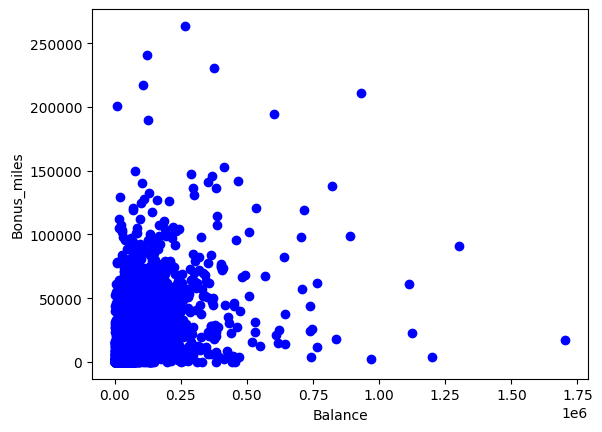

In [28]:
dfsubset = df.loc[:, ['Balance', 'Bonus_miles']]
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.scatter(dfsubset['Balance'], dfsubset['Bonus_miles'], color = 'blue')
plt.show()

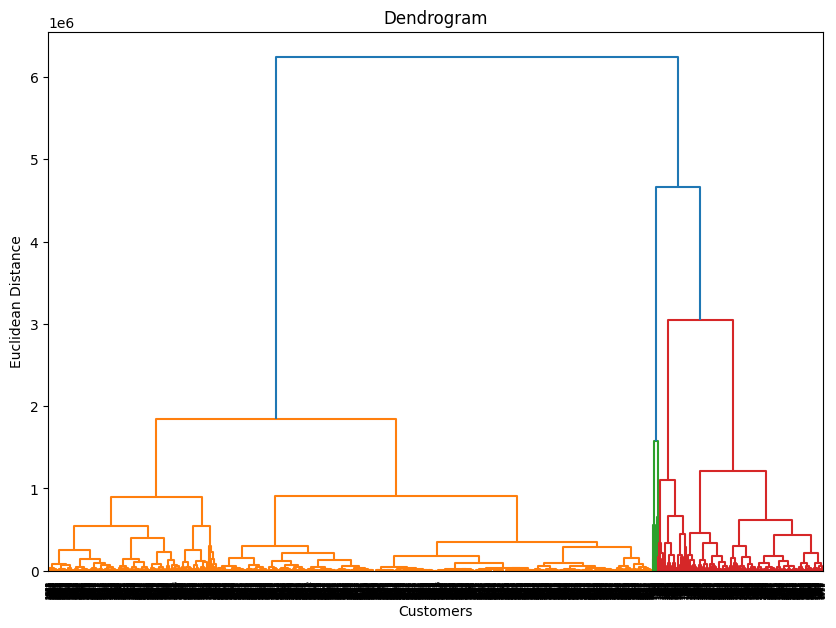

In [29]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(dfsubset, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
cluster.fit_predict(dfsubset)

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
#cluster fit

c1 = cluster.fit_predict(dfsubset)
from sklearn.metrics import silhouette_score
silhouette_score(dfsubset, c1)

np.float64(0.6325608142175771)

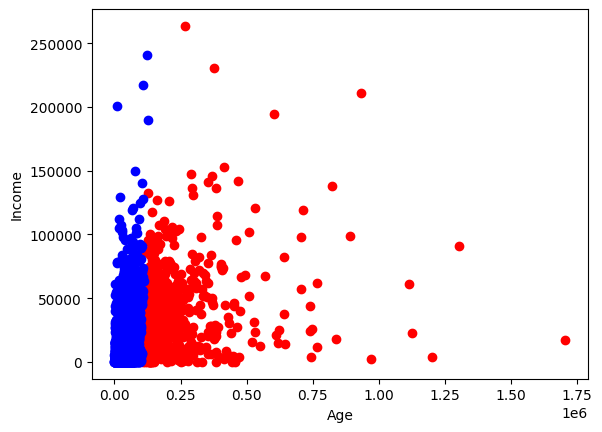

In [40]:
X = dfsubset.values

plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(X[c1==0,0], X[c1==0,1], color = 'red')
plt.scatter(X[c1==1,0], X[c1==1,1], color = 'blue')
plt.show()

In [41]:
## try k means again with normalized instead of standardized

from sklearn.preprocessing import normalize

#normalize
norm_x = normalize(X)
df_norm_x = pd.DataFrame(norm_x)
df_norm_x


,0,1
0,0.999981,0.006183
1,0.999938,0.011172
2,0.995067,0.099208
3,0.999428,0.033819
4,0.914315,0.405003
...,...,...
3994,0.908004,0.418962
3995,0.999884,0.015235
3996,0.945101,0.326779
3997,0.999959,0.009107


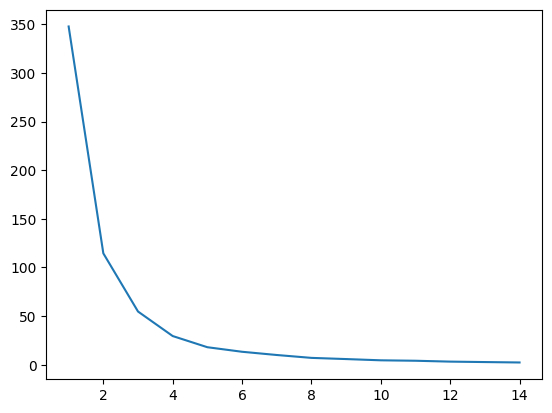

In [42]:
from sklearn.cluster import KMeans
cluster_score=[]

for k in range(1,15):
  km = KMeans(n_clusters=k)
  km.fit(df_norm_x)
  cluster_score.append(km.inertia_)

plt.plot(range(1,15), cluster_score)
plt.show()

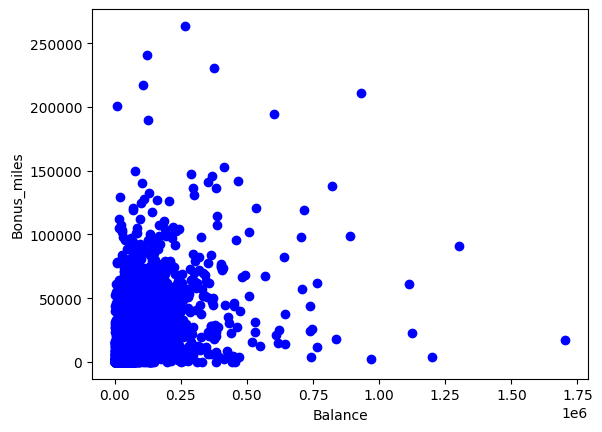

In [43]:
dfsubset = df.loc[:, ['Balance', 'Bonus_miles']]
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.scatter(dfsubset['Balance'], dfsubset['Bonus_miles'], color = 'blue')
plt.show()

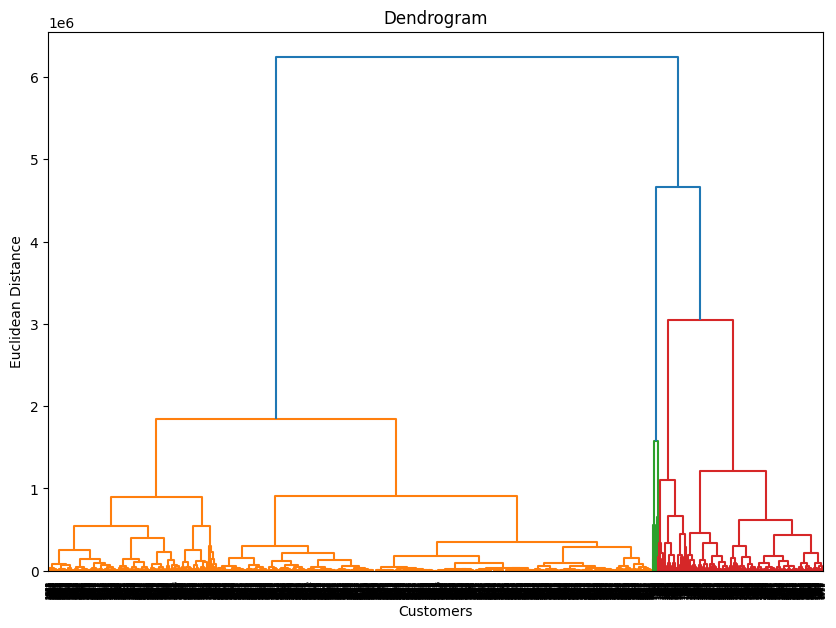

In [44]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(dfsubset, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
cluster.fit_predict(dfsubset)

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
#cluster fit

c2 = cluster.fit_predict(dfsubset)
from sklearn.metrics import silhouette_score
silhouette_score(dfsubset, c2)

np.float64(0.6325608142175771)

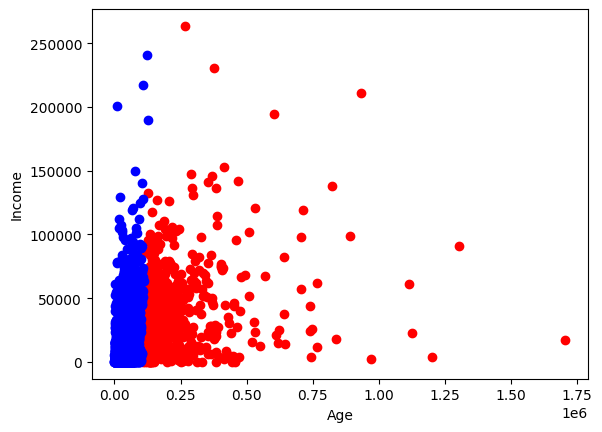

In [47]:
X = dfsubset.values

plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(X[c1==0,0], X[c1==0,1], color = 'red')
plt.scatter(X[c1==1,0], X[c1==1,1], color = 'blue')
plt.show()